# DS 2500 HW 1

Due: Fri Feb 10 @ 11:59PM

### Submission Instructions
Please submit both of the following to the corresponding [gradescope](https://www.gradescope.com/courses/478298) assignment:
- this `.ipynb` file 
    - give a fresh `Kernel > Restart & Run All` just before uploading
- a `.py` file consistent with your `.ipynb`
    - `File > Download as ...`
    
Gradescope may run your `.py` submission to determine part of your score for this assignment.  See the [autograder instructions](https://github.com/matthigger/gradescope_auto_py/blob/main/stud_instruct.md) for details.


### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds2500/admin_piazza.html)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds2500/office_hours.html)
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds2500/python_style.html)
- [No student may view or share their ungraded homework with another](https://course.ccs.neu.edu/ds2500/syllabus.html#academic-integrity-and-conduct)

todo: table w/ points


# Part 1 (29 points): Plotting Video Game Data

Using this [Kaggle source](https://www.kaggle.com/datasets/nyagami/video-game-ratings-from-imdb) we've obtained a video game dataset.  Each row represents the average video game made in a particular year.  Features are:
- year 
- rating
    - average rating of all games that year
- votes
    - average number of ratings, per single game, in that year
- total games
    - total number of games (in the dataset) for a given year

The code below loads a numpy array `x` with four columns, each column corresponds to some feature directly above.  Their ordering is given in `col_list` (i.e. `col_list[2] = 'votes'` tells us the third column corresponds to the "average number of ratings given to a single game made in that year").

Using this data, generate the following three graphs:

|                              Part 1.1: hist (7 points)                              |                              Part 1.2: line (11 points)                             |                              Part 1.3: scatter (11 points)                              |
|:--------------------------------------------------------------:|:--------------------------------------------------------------:|:-----------------------------------------------------------------:|
| <img src='https://i.ibb.co/9VmrWFd/part-a-hist.png' width=250> | <img src='https://i.ibb.co/kqYZTwJ/part-a-line.png' width=250> | <img src='https://i.ibb.co/N1VVRnz/part-a-scatter.png' width=250> |

notes:
- plot graphs same order as above
- no need to make them subplots
- use `cmap='jet'` in the last scatter plot to reproduce given colormap
- don't worry about minor differences between your output and the examples above.
    - for example: slightly different x tick labels (the 5, 6, 7 in the first plot)
- please do not load data into pandas (`pd.DataFrame` or `pd.Series`)
    - our goal in this problem is to exercise your ability to plot directly from numpy


In [1]:
# pickle is a module which allows us to store python variables in a file
# (like one pickles cucumbers so they last over the winter ... cute, right?)
import pickle
import pathlib

with open('game_per_year.p', 'rb') as f:
    x, col_list = pickle.load(f)


Text(0.5, 1.0, 'histogram of video game ratings')

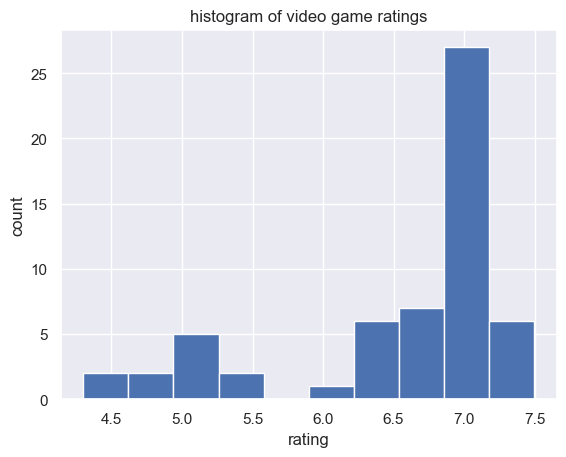

In [2]:
#histogram plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

#create histogram, use second column because it is rating and use all rows
plt.hist(x[:, 1])

#set labels
plt.xlabel('rating')
plt.ylabel('count')
plt.title('histogram of video game ratings')

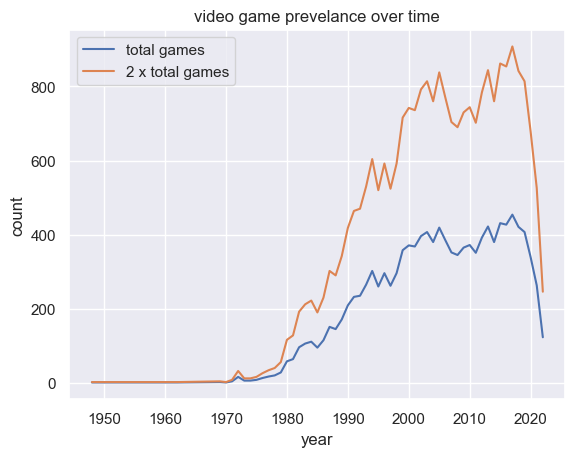

In [3]:
#line plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

#set axes
x_axis = x[:, 0]
y_axis1 = x[:, 3]
y_axis2 = x[:, 3] * 2

#plot both lines
plt.plot(x_axis, y_axis1)
plt.plot(x_axis, y_axis2)

#set labels
plt.xlabel('year')
plt.ylabel('count')
plt.title('video game prevelance over time')
plt.legend(['total games', '2 x total games'])

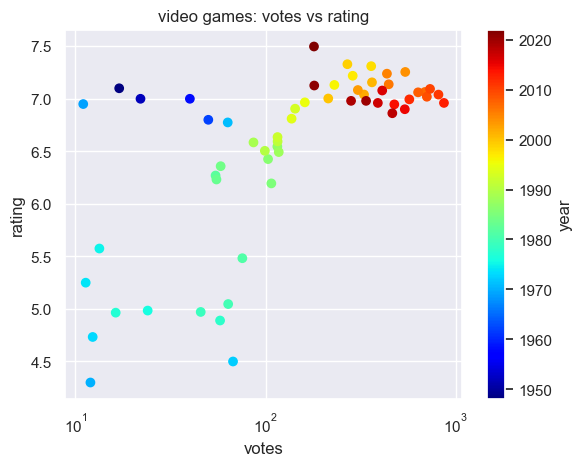

In [4]:
#scatter plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

#set axes
x_axis = x[:, 2]
y_axis = x[:, 1]
c = x[:, 0]

#create plot
plt.scatter(x_axis, y_axis, c = c, cmap = 'jet')

#labels and scale
plt.xscale('log')
plt.xlabel('votes')
plt.ylabel('rating')
plt.title('video games: votes vs rating')

plt.colorbar().set_label('year')



#### Mea Culpa: Shouldn't we use a `pd.DataFrame` for loading data like this?  (`pd.read_csv()`)
True, you really should.  This array / list combination is relatively awkward to work with.  However I want to exercise your skills plotting directly from numpy here.


# Part 2: Cereal!

## Part 2.1 (14 points)

Create a dataframe of the following table which is a subset of the data [here](https://www.kaggle.com/datasets/crawford/80-cereals?resource=download).

Please:
- show your final dataframe via the output of a jupyter cell, so it may be graded on gradescope
- create the DataFrame in jupyter, rather than loading a csv file.

| cereal name              | mfr           | calories | cups | rating |
|-------------------|---------------|----------|------|--------|
| Cap'n'Crunch      | Quaker Oats   | 120      | 0.75 | 18     |
| Cocoa Puffs       | General Mills | 110      | 1    | 23     |
| Count Chocula     | General Mills | 110      | 1    | 22     |
| Nutri-grain Wheat | Kelloggs      | 90       | 1    | 60     |
| Shredded Wheat    | Nabisco       | 80       | 1    | 68     |
| Trix              | General Mills | 110      | 1    | 28     |

Note: I couldn't show it in the markdown table, but the first column of the data above, `cereal name`, should be the index of your dataframe.  You can set the name of the index via `df_cereal.index.name = 'cereal name'`.


In [5]:
import pandas as pd
import numpy as np
                     
#create dataframe
df_cereal = pd.DataFrame({'mfr': ['Quaker Oats', 'General Mills', 'General Mills', 'Kelloggs', 'Nabisco', 'General Mills'], 
                          'calories': [120, 110, 110, 90, 80, 100], 
                          'cups': [.75, 1, 1, 1, 1, 1], 
                          'rating':[18, 23, 22, 60, 68, 28]},
                        index = ("Cap'n'Crunch", 'Cocoa Puffs', 'Count Chocula', 'Nutri-grain Wheat', 'Shredded Wheat', 'Trix'))

#index using the cereal name
df_cereal.index.name = 'cereal name'

df_cereal

,mfr,calories,cups,rating
cereal name,,,,
Cap'n'Crunch,Quaker Oats,120,0.75,18
Cocoa Puffs,General Mills,110,1.00,23
Count Chocula,General Mills,110,1.00,22
Nutri-grain Wheat,Kelloggs,90,1.00,60
Shredded Wheat,Nabisco,80,1.00,68
Trix,General Mills,100,1.00,28


## Part 2.2, 2.3 & 2.4:

For the remaining questions in part 2, please:
- construct a series or dataframe object which
    - contains the answer to the question
    - is as simple as possible
- Provide a markdown cell of one sentence which clearly answer each question.
    
We work with this small dataset to ensure you can validate your answers, but **your answer is expected to work on any dataset size**.  For example, don't assume that the only manufacturers are the ones present in this data, programmatically get a list of all manufacturers via 

```python
df_cereal.loc[:, 'mfr'].unique()
```

## Part 2.2 (7 points)
Which cereal has the highest rating?


In [6]:
#find the index of the cereal with the highest rating then pass that through the array of indexes
idx_max_rating = np.argmax(df_cereal['rating'])
df_cereal.index[idx_max_rating]


'Shredded Wheat'

The cereal that has the highest rating is Shredded Wheat

## Part 2.3 (9 points)
Which cereal has the highest calorie density (most calories per cup)?


In [7]:
#get new column for calorie density
df_cereal['cal density'] = df_cereal['calories']/df_cereal['cups']

#return the cereal with the highest calorie density
idx_max_density = df_cereal['cal density'].argmax()
df_cereal.index[idx_max_density]


"Cap'n'Crunch"

The cereal that has the highest calorie density is Cap'n'Crunch

## Part 2.4 (11 points)
Which manufacturer has the highest average rating, across all their cereals?


# group by the cereal manufacturers and get averages
df_mfr = df_cereal.groupby('mfr').mean()

#find the manufacturer with the highest average rating
idx_max_avg_rating = df_mfr['rating'].argmax()
df_mfr.index[idx_max_avg_rating]

The manufacturer that has the highest average rating across all their cereals is Nabisco

## Part 3: Whats the best candy?

Using the candy data ([source](https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking) & [realted article & video](http://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/)) you'll be asked to investigate a few questions below.  Each response should include:
1. One (or more) graphs which justifies your responses
    - you can make more than one graph if you prefer, the solution uses one graph per part though
    - ideally our graphs are "self-contained" and can be understood without any further context ... this isn't always possible but get as close as possible while keeping it simple
        - axis labels, titles, legends ...
        - make them big and easy to read (`plt.gcf().set_size_inches(15, 5)` or similar)
1. Support each answer with 1 to 4 full sentences which refer to the graphs.
    - for example: "XXXXXX candy can be seen as the most popular because it has some feature in the graph below"
    - your justification should guide a non-technical reader through understanding your graph
        - for example: these dots are higher / more rightward / more red than the others...

### Data
Data dictionary (copied from source)

Header | Description
-------|------------
chocolate | Does it contain chocolate?
fruity | Is it fruit flavored?
caramel | Is there caramel in the candy?
peanutalmondy | Does it contain peanuts, peanut butter or almonds?
nougat | Does it contain nougat?
crispedricewafer | Does it contain crisped rice, wafers, or a cookie component?
hard | Is it a hard candy?
bar | Is it a candy bar?
pluribus | Is it one of many candies in a bag or box?
sugarpercent | The percentile of sugar it falls under within the data set.
pricepercent | The unit price percentile compared to the rest of the set.
winpercent | The overall win percentage according to 269,000 matchups.


clarifying note: `winpercent` represents the percentage of times people preferred a particular candy among all binary survey questions it was included in (e.g. "Do you prefer 100 grand or 3 musketeers?").



In [9]:
import pandas as pd

df_candy = pd.read_csv('candy-data.csv')
df_candy.head()


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## Part 3.1 (15 points): chocolate / fruity / caramel


Consider the groups of candies which are categorized as:
- chocolate
- caramel
- fruity

in the table above.

Assuming that `winpercent` is an appropriate estimate of candy popularity, fill in the blanks of each statement below using one of the three candy groups (hint: each group used once).

- _______ candies are typically the most popular
- _______ candies are typically the least popular
- _______ candies are the most inconsistent among the group, some candies in the group are popular while others are quite unpopular


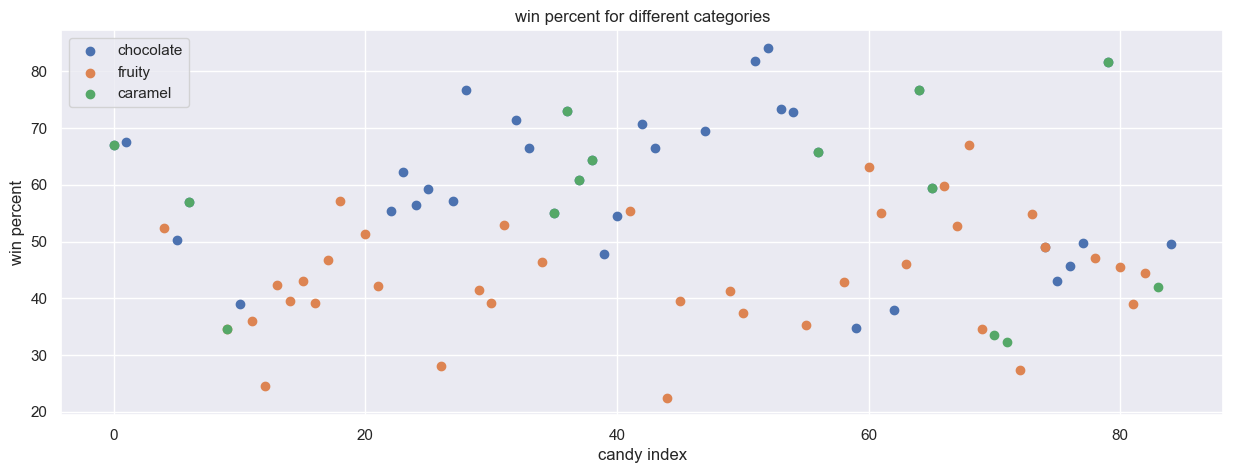

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

#list of the 3 different categories
category_list = ['chocolate', 'fruity', 'caramel']

#go through each category in the list and create a scatterplot of the candies that fit in that category
for item in category_list:
    s_bool = df_candy[item] == 1
    df_candy_bool = df_candy.loc[s_bool, :]
    
    #built scatterplot
    plt.scatter(df_candy_bool.index, df_candy_bool['winpercent'], label = item)
  
#label the graph
plt.legend()
plt.xlabel('candy index')
plt.ylabel('win percent')
plt.title('win percent for different categories')
plt.gcf().set_size_inches(15, 5)

Chocolate candies, on average, are the most popular out of the 3. They are the blue dots on the graph and they are nearest the top of the graph, which is the highest win percentage. The orange dots are fruity candies and they have the lowest win percentage, as evidenced by their on average lower position on the graph. The caramel candies are the most inconsistent among the group, and as seen by the green dots on the graph, they are spread throughout the different win percentages and do not cluster.

# Part 3.2 (15 points)

Are popular candies more expensive?

Feel free to give a "soft" answer here if you feel its appropriate (e.g. "pretty much", "a tiny bit").  You needn't respond with a hard yes / no.


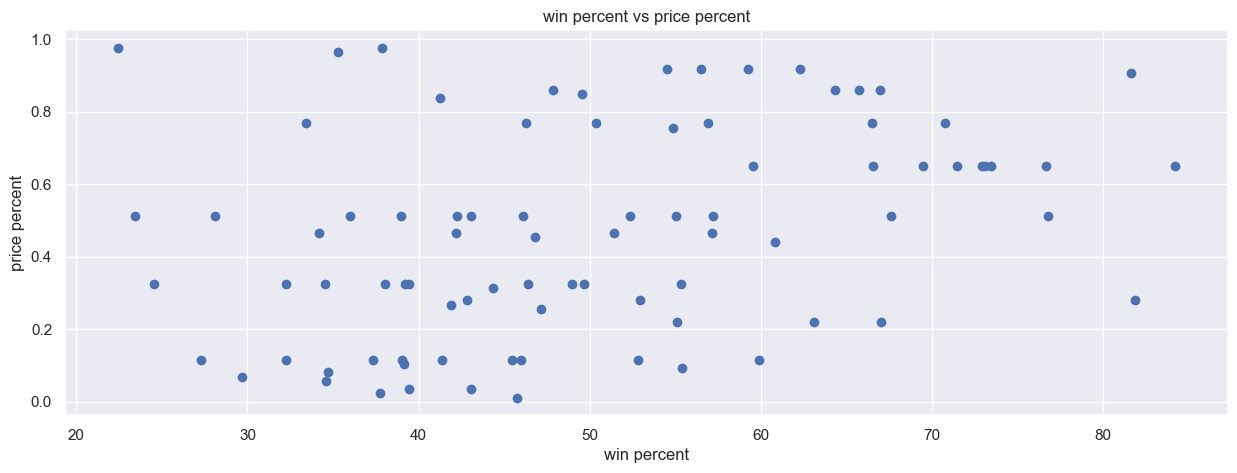

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

#create scatterplot
plt.-(df_candy['winpercent'], df_candy['pricepercent'])

#label and title graph
plt.xlabel('win percent')
plt.ylabel('price percent')
plt.title('win percent vs price percent')
plt.gcf().set_size_inches(15, 5)

Popular candies tend to be slightly more expensive. The right hand side of the graph are the dots with the higher win percent, meaning they are more popular, and those dots tend to also be higher on the y axis, which is the price percent of the candy. The dots that are more to the left on the x-axis, which are less popular, tend to be lower on the y-axis, or lower in price.

### Part 3.3 (+3 points)

Among all the different candy varities in `feat_list` whats the cheapest way to get as many calories as possible?

hints: 
- this question is an adventure, it may take a bit more effort than the other two
- strictly speaking, you can't answer this question from the data ... what assumptions do we need to make?  Explicitly write them out
- have fun!


For this, I am going to assume that the candies with a higher sugar percent have more calories.

C:\Users\kenne\AppData\Local\Temp\ipykernel_2492\1145768046.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_candy_variety = df_candy.groupby(variety).mean()
C:\Users\kenne\AppData\Local\Temp\ipykernel_2492\1145768046.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_candy_variety = df_candy.groupby(variety).mean()
C:\Users\kenne\AppData\Local\Temp\ipykernel_2492\1145768046.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be vali

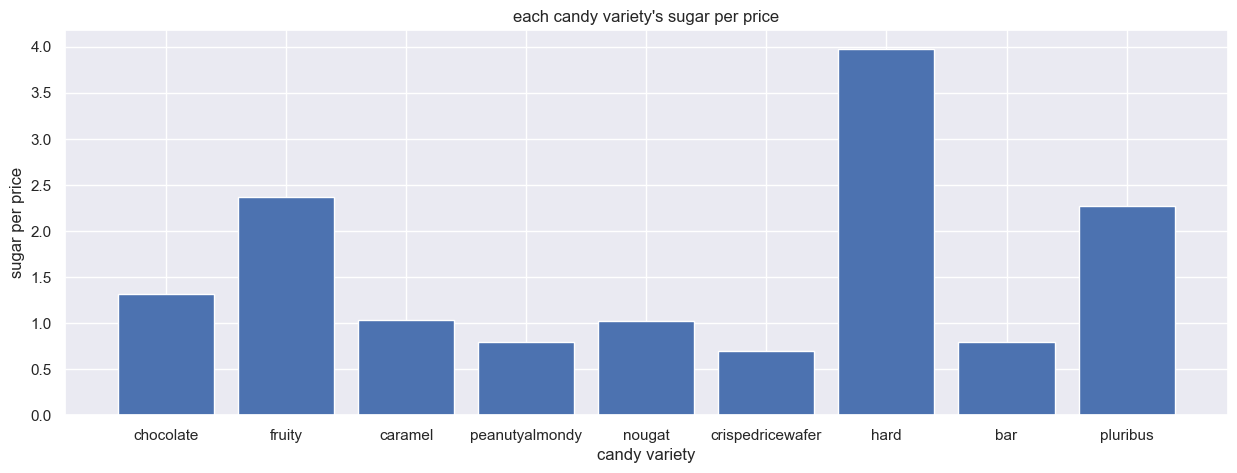

In [12]:
feat_list = ('chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus')

import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

#create new df column to look at how much sugar% is in a candy per price unit
df_candy['sugar per price'] = df_candy['sugarpercent']/df_candy['pricepercent']

#establish dictionary to keep track of the average sugar% per price for each candy variety
sugar_price_percent_dict = defaultdict(lambda: 0)

#iterate through each candy variety
for variety in feat_list:
    #group by the candy variety
    df_candy_variety = df_candy.groupby(variety).mean()
    #access the average sugar% per price unit of that candy variety
    sugprice = df_candy_variety.loc[1, 'sugar per price']
    #add that sugar% per price into dictionary
    sugar_price_percent_dict[variety] = sugprice
    
#separate keys and values of dict into separate list
keys = list(sugar_price_percent_dict.keys())
values = list(sugar_price_percent_dict.values())

#create bar graph
plt.bar(keys, values)

#label
plt.xlabel('candy variety')
plt.ylabel('sugar per price')
plt.title("each candy variety's sugar per price")
plt.gcf().set_size_inches((15,5))

According to the graph, hard candies have the most sugar per price. This means, using my assumption, that eating hard candies is the cheapest way to get as many calories as possible.